## **Neuron** ##
Each input value, or element in matrix X, needs to be multiplied by a corresponding weight and then added together with all the other results for each neuron.

A neuron takes inputs, does some math with them, and produces one output. Here’s what a 2-input neuron looks like:

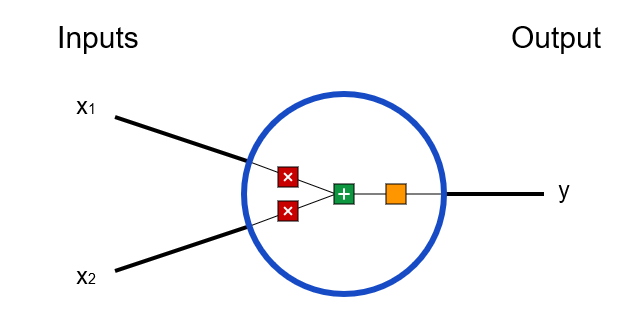

3 things are happening here. First, each input is multiplied by a weight: 

 - x1​ → x1​∗w1​ 
 - x2 → x2∗w2

 Next, all the weighted inputs are added together

 - (x1​∗w1​)+(x2​∗w2​)

 Finally, the sum is passed through an activation function

 - y = f(x1​∗w1​+x2​∗w2​)

 The activation function is used to turn an unbounded input into an output that has a nice, predictable form. A commonly used activation function is the sigmoid function

 The sigmoid function only outputs numbers in the range (0,1)(0, 1)(0,1). You can think of it as compressing (−∞,+∞) to (0,1)(0, 1)(0,1) - big negative numbers become ~0, and big positive numbers become ~1

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

## **Sigmoid** ##

Sigmoid takes a real value as input and outputs another value between 0 and 1. 

In [ ]:
def sigmoid(x):
  # Sigmoid activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

def deriv_sigmoid(x):
  # Derivative of sigmoid: f'(x) = f(x) * (1 - f(x))
  fx = sigmoid(x)
  return fx * (1 - fx)

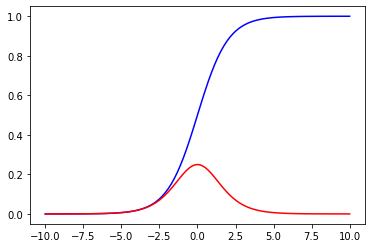

In [ ]:
X = np.linspace(-10, 10, 100)

plt.plot(X, sigmoid(X), c="b") # sigmoid in blue
fig = plt.plot(X, deriv_sigmoid(X), c="r") # sigmoid_p in red

In [ ]:
def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights):
    self.weights = weights

  def forward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) 
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
# b = 4
n = Neuron(weights)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.forward(x))    # 0.9990889488055994

0.9525741268224334


## **Combining Neurons into a Neural Network** ##

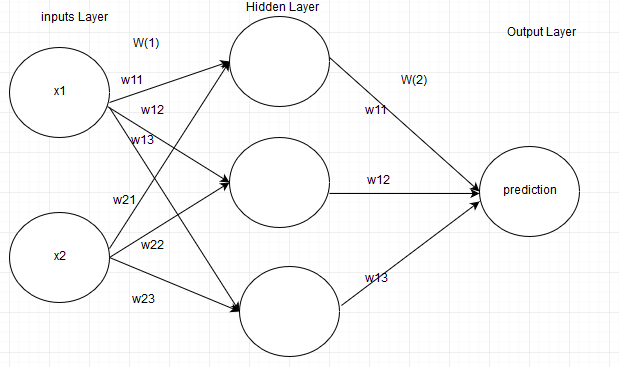

This network has 2 inputs, a hidden layer with 2 neurons , and an output layer with 1 neuron .
A hidden layer is any layer between the input (first) layer and output (last) layer. There can be multiple hidden layers!


## **Forward Propagation** ##

we need by multiplying our input data matrix by our weight matrix. Using matrix multiplication allows us to pass multiple inputs through at once by simply adding rows to the matrix X. From here on out, we'll refer to these matrics as X, W one, and z two, where z two the activity of our second layer. Notice that each entry in z is a sum of weighted inputs to each hidden neuron. Z is of size 3 by 3, one row for each example, and one column for each hidden unit.

- Z(2) = X ∗ W(1)​ 
 we have the activities for our second layer, z two, we need to apply the activation function, here we’re using a sigmoid as our activation function, using f to denote our activation function
- a(2) = f( X ∗ W(1)​ )

in the next layer, we multiply the 3 x 3 matrix by 3 x 1 to get the 3 x 1 output(predect value)
- Z(3) = a(2) ∗ W(2)​ 
then we appy the sigmoid function to get the bound value between 0 to 1
- predicted output y = f (a(2) ∗ W(2)​ )





## **Cost Function** ##



One way to compute an overall cost is to take each error value, square it, and add these values together. Multiplying by one half will make things simpler 

Now that we have a cost, or job is to minimize it. When someone says they’re training a network, what they really mean is that they're minimizing a cost function.

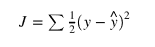

Conceptually, this is pretty simple concept. We have a collection of individual weights, and we're saying that there is some combination of w's that will make our cost, J, as small as possible.

We can derive an expression for dJdW, that will give us the rate of change of J with respect to W, for any value of W! If dJdW is positive, then the cost function is going uphill. If dJdW is negative the cost function is going downhill.


## **Backpropagation** ##

Our weights, W, are spread across two matrices, W1 and W2. We’ll separate our dJ/dW computation in the same way, by computing dJdW1 and dJdW2 independently. We should have just as many gradient values as weight values, so when we’re done, our matrices dJdW1 and dJdW2 will be the same size as W1 and W2.

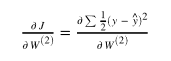



- Y is just our test scores, which won’t change, so the derivative of y, a constant, with respect to W two is 0! yHat, on the other hand, does change with respect to W two, so we’ll apply the chain rule and multiply our results by minus dYhat/dW2.

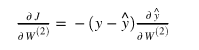

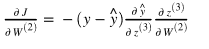

-  we need to differentiate our sigmoid activation function with respect to z.

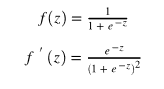

-  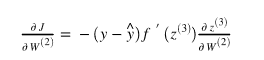

-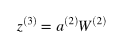

-  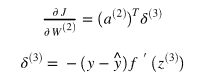


- We have one final term to compute: dJ/dW1. 

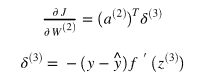

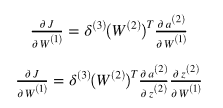

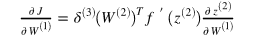

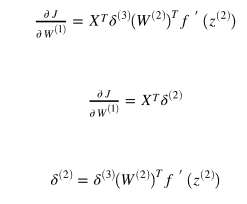

In [ ]:
# Whole Class with additions:
class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2
    
    def train(self, X, y_true):
        '''
        - data is a (n x 2) numpy array, n = # of samples in the dataset.
        - all_y_trues is a numpy array with n elements.
          Elements in all_y_trues correspond to those in data.
        '''
        costs = [] # keep costs during training, see if they go down
        learn_rate = 0.1
        epochs = 10001 # number of times to loop through the entire dataset

        for epoch in range(epochs):

            self.cost1  = self.costFunction(X,y_true)
            self.dJdW1, self.dJdW2 = self.costFunctionPrime(X,y_true)

            scalar = 3
            self.W1 = self.W1 - learn_rate*self.dJdW1
            self.W2 = self.W2 - learn_rate*self.dJdW2
            # --- Calculate total loss at the end of each epoch
            if epoch % 1000 == 0:
              loss = self.costFunction(X, y)
              costs.append(loss)
              print("Epoch %d loss: %.3f" % (epoch, loss))

        fig = plt.plot(costs)

Epoch 0 loss: 0.913
Epoch 1000 loss: 0.780
Epoch 2000 loss: 0.760
Epoch 3000 loss: 0.749
Epoch 4000 loss: 0.742
Epoch 5000 loss: 0.736
Epoch 6000 loss: 0.732
Epoch 7000 loss: 0.729
Epoch 8000 loss: 0.726
Epoch 9000 loss: 0.723
Epoch 10000 loss: 0.721


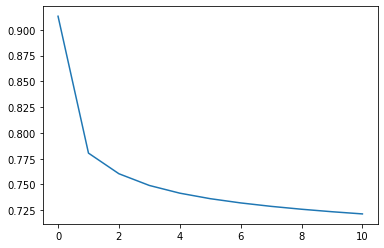

In [ ]:
# each point is length, width, type (0, 1)

X = np.array(([3,   1.5], [2,   1],[4,   1.5], [3,   1],[3.5, .5],[2,   .5], [5.5,  1],[1,    1]),dtype=float)
y = np.array(([1], [0], [1],[0], [1], [0],[1], [0]), dtype=float)

mystery_flower = [4.5, 1]

# Train our neural network!
network = Neural_Network()
network.train(X, y)